In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('happiness_score_dataset.csv')

In [3]:
data                                                    #There are 158 rows and 12 columns

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

#### Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
2              7.527                   1.32548  1.36058   
3              7.522                   1.45900  1.33095   
4              7.427                   1.32629  1.32261   
..               ...                       ...      ...   
153            3.465                   0.22208  0.77370   
154            3.340                   0.28665  0.35386   
155            3.006                   0.66320  0.47489   
156            2.905                   0.01530  0.41587   
157            2.839                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 11 columns]

### 
* There are 12 coulmns and 158 rows
* Which include datatype of object, integer, and float.
* No null values are there
* memmory usage: 14.9 Kb, it does not utilize more space

In [5]:
data.nunique()   # Columns That Contain a Single Value

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

#### Let's see coorelation between the variables

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

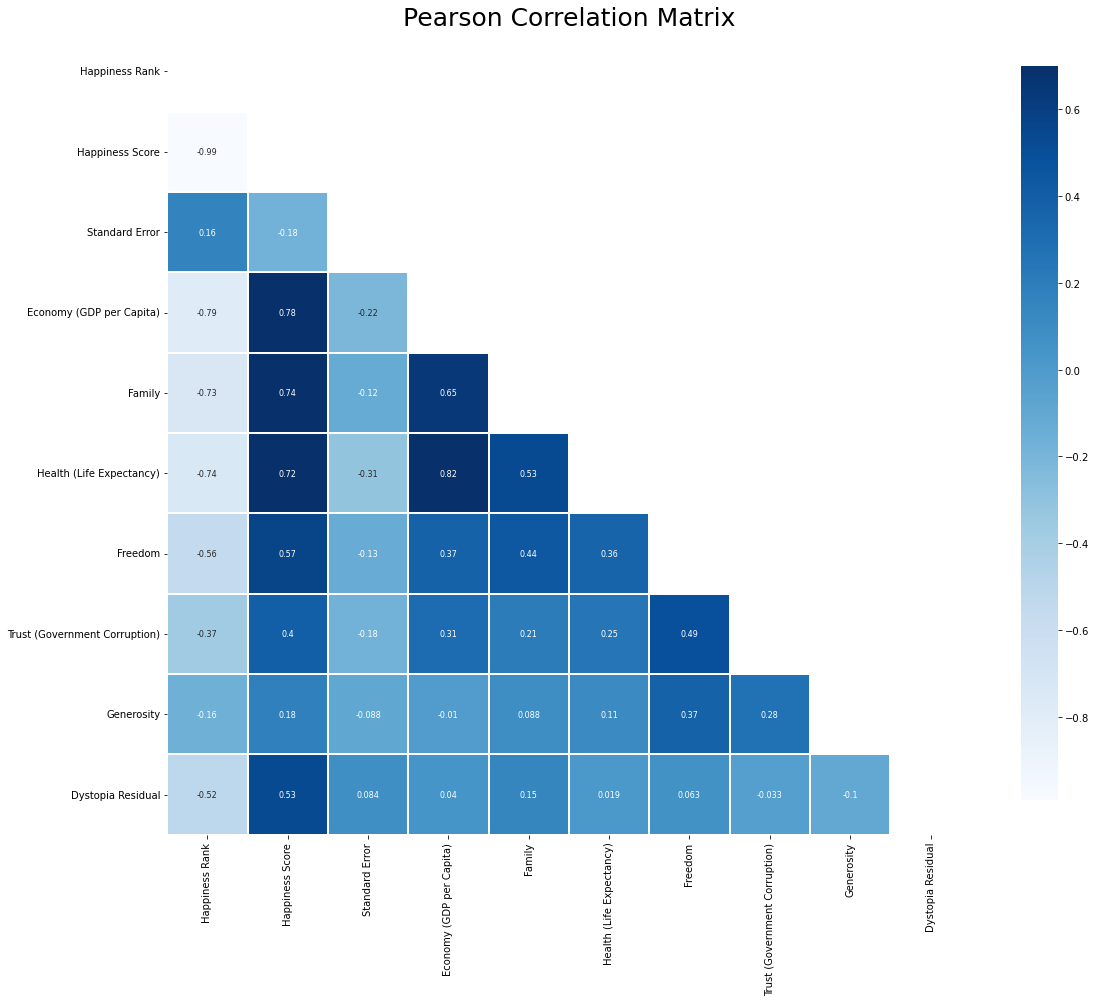

In [6]:
mask = np.zeros_like(data.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(data.corr(),
                        linewidths=0.25,vmax=0.7,square=True,cmap="Blues", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

### 
* Economy, Health, Family having are correlated with Happiness Score

In [7]:
data.drop(columns = ['Standard Error'], inplace = True)

In [8]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(data['Economy (GDP per Capita)'], data['Happiness Score'],color='blue',label="Data", s = 12)
#plt.plot([lineStart, lineEnd], [lineStart, lineEnd], color = 'r')

plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['top'].set_visible(False)

#### 
As we can see the higher the per capita income, the more happinees score is

It is very common to use a country’s GDP or GDP per capita to evaluate a country’s development and productivity, as well as the well-beings of people.

In [9]:
#!pip install chart_studio

In [10]:
data.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201  
2                        0.48357     0.34139            2.49204  
3                        0.36503     0.34699            2.46531  
4                        0.32957     0.45811            2.45176

### Univariate Analysis

In [11]:
data[data['Country']=='India']                              # India is in 116th pos out of 158

Country         Region  Happiness Rank  Happiness Score  \
116   India  Southern Asia             117            4.565   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
116                   0.64499  0.38174                   0.51529  0.39786   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
116                        0.08492     0.26475            2.27513

In [12]:
data.duplicated().any()       #Checking for duplicate

False

In [13]:
data['Region'].value_counts()                  #Count of countries region wise

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

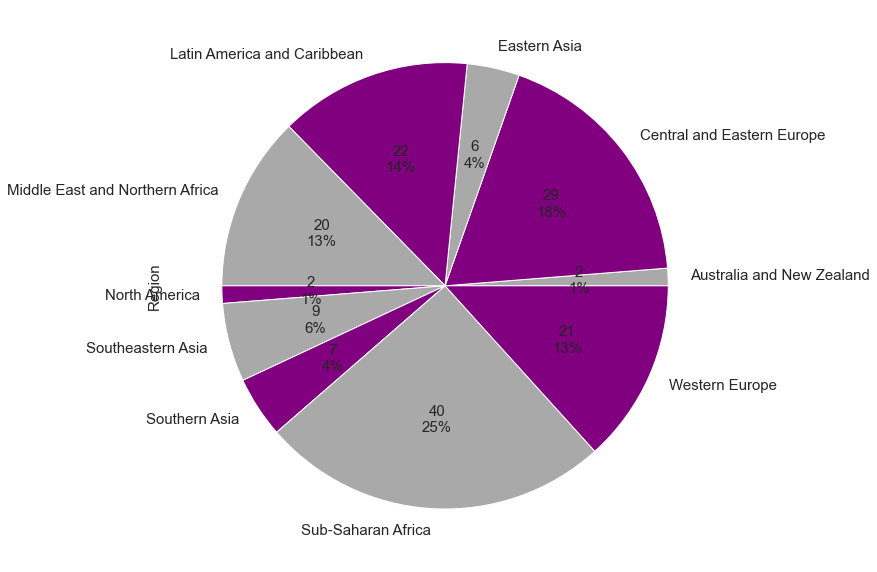

In [14]:
def label_function(val):                                                      #Sharing% Number of countries in differet region
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'
plt.subplots(ncols=1, figsize=(10, 15))
data.groupby('Region').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                 colors=['darkgrey', 'purple']).set_ylabel('Region', size=15)
plt.show

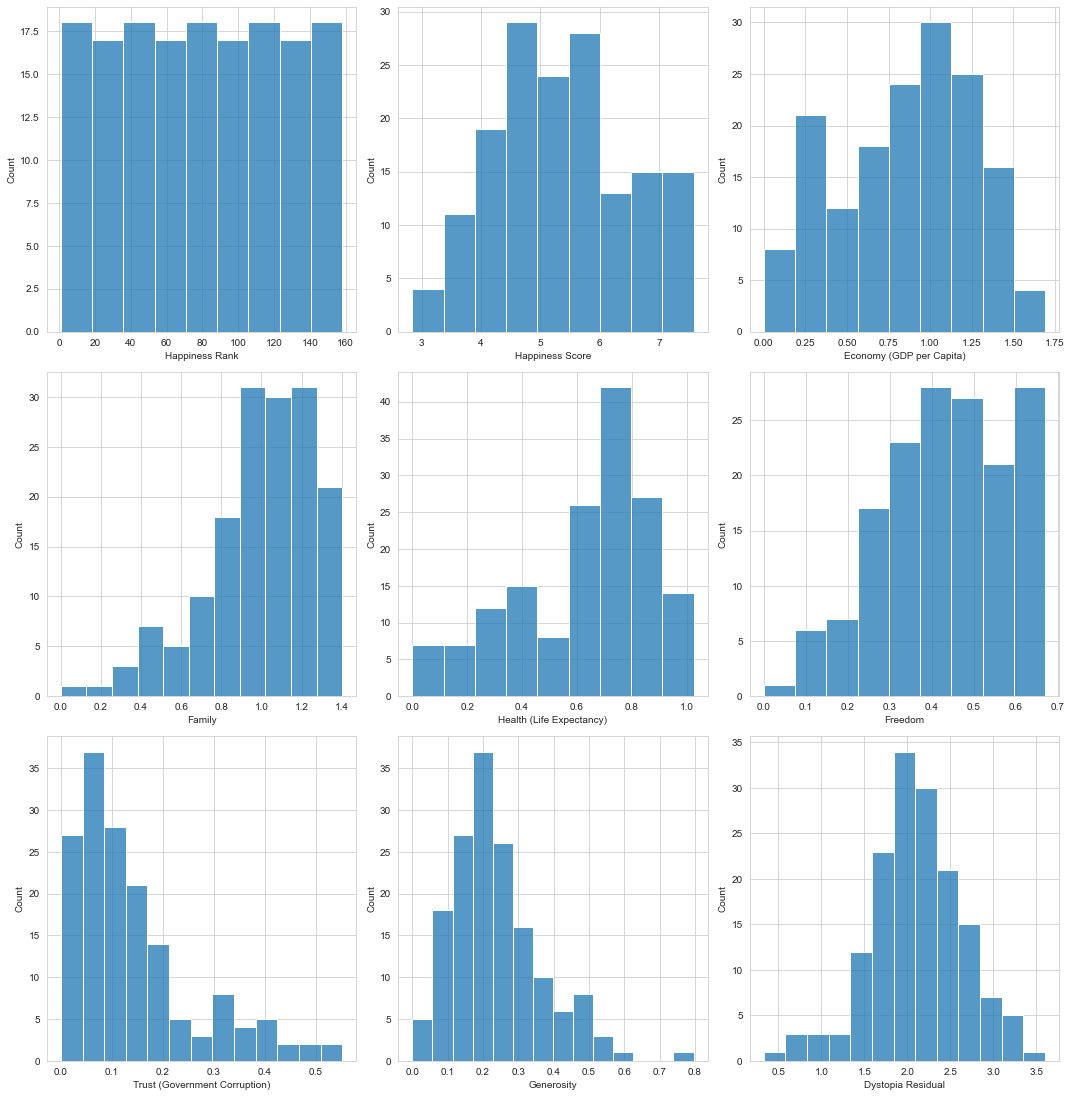

In [15]:
cols = 3                                                         #we can see the frequency ditribution here
rows = 4
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()


In [16]:
data[data['Happiness Rank'] <= 10].loc[:,'Country':'Happiness Rank']

Country                     Region  Happiness Rank
0  Switzerland             Western Europe               1
1      Iceland             Western Europe               2
2      Denmark             Western Europe               3
3       Norway             Western Europe               4
4       Canada              North America               5
5      Finland             Western Europe               6
6  Netherlands             Western Europe               7
7       Sweden             Western Europe               8
8  New Zealand  Australia and New Zealand               9
9    Australia  Australia and New Zealand              10

#### Top 10 Coutries w.r.t happiness

In [17]:
data[['Country', 'Happiness Rank']].sort_values(by = 'Happiness Rank',
                                                ascending = True).head(10)

Country  Happiness Rank
0  Switzerland               1
1      Iceland               2
2      Denmark               3
3       Norway               4
4       Canada               5
5      Finland               6
6  Netherlands               7
7       Sweden               8
8  New Zealand               9
9    Australia              10

#### Top 10 Countries W.R.T GDP

In [18]:
data[['Country', 'Economy (GDP per Capita)']].sort_values(by = 'Economy (GDP per Capita)',
                                                ascending = False).head(10)

Country  Economy (GDP per Capita)
27                 Qatar                   1.69042
16            Luxembourg                   1.56391
38                Kuwait                   1.55422
23             Singapore                   1.52186
3                 Norway                   1.45900
19  United Arab Emirates                   1.42727
0            Switzerland                   1.39651
34          Saudi Arabia                   1.39541
14         United States                   1.39451
71             Hong Kong                   1.38604

In [19]:
data.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201  
2                        0.48357     0.34139            2.49204  
3                        0.36503     0.34699            2.46531  
4                        0.32957     0.45811            2.45176

#### Top 10 Countries W.R.T Family

In [20]:
data[['Country', 'Family']].sort_values(by = 'Family',
                                                ascending = False).head(10)

Country   Family
1       Iceland  1.40223
17      Ireland  1.36948
2       Denmark  1.36058
0   Switzerland  1.34951
43   Uzbekistan  1.34043
3        Norway  1.33095
4        Canada  1.32261
8   New Zealand  1.31967
5       Finland  1.31826
35        Spain  1.31379

#### Top 10 Countries W.R.T Life Expectancy

In [21]:
data[['Country', 'Health (Life Expectancy)']].sort_values(by = 'Health (Life Expectancy)',
                                                ascending = False).head(10)

Country  Health (Life Expectancy)
23    Singapore                   1.02525
71    Hong Kong                   1.01328
45        Japan                   0.99111
46  South Korea                   0.96538
35        Spain                   0.95562
49        Italy                   0.95446
1       Iceland                   0.94784
28       France                   0.94579
0   Switzerland                   0.94143
9     Australia                   0.93156

#### Top 10 Countries W.R.T Freedom

In [22]:
data[['Country', 'Freedom']].sort_values(by = 'Freedom',
                                                ascending = False).head(10)

Country  Freedom
3                  Norway  0.66973
0             Switzerland  0.66557
144              Cambodia  0.66246
7                  Sweden  0.65980
43             Uzbekistan  0.65821
9               Australia  0.65124
2                 Denmark  0.64938
5                 Finland  0.64169
19   United Arab Emirates  0.64157
27                  Qatar  0.64040

#### Top 10 Countries W.R.T Trust(Govt. Corruption

In [23]:
data[['Country', 'Trust (Government Corruption)']].sort_values(by = 'Trust (Government Corruption)',
                                                ascending = False).head(10)

Country  Trust (Government Corruption)
153                Rwanda                        0.55191
27                  Qatar                        0.52208
23              Singapore                        0.49210
2                 Denmark                        0.48357
7                  Sweden                        0.43844
8             New Zealand                        0.42922
0             Switzerland                        0.41978
5                 Finland                        0.41372
90      Somaliland region                        0.39928
19   United Arab Emirates                        0.38583

#### Top 10 Countries W.R.T Generocity

In [24]:
data[['Country', 'Generosity']].sort_values(by = 'Generosity',
                                                ascending = False).head(10)

Country  Generosity
128            Myanmar     0.79588
33            Thailand     0.57630
20      United Kingdom     0.51912
36               Malta     0.51752
73           Indonesia     0.51535
90   Somaliland region     0.50318
78              Bhutan     0.47998
6          Netherlands     0.47610
8          New Zealand     0.47501
155              Syria     0.47179

In [25]:
fig = plt.figure(figsize = (23,45))# width x height
ax1 = fig.add_subplot(4, 2, 1) # row, column, position
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3) # row, column, position
ax4 = fig.add_subplot(4, 2, 4)
ax5= fig.add_subplot(4, 2, 5)# row, column, position
ax6= fig.add_subplot(4, 2, 6)
ax7= fig.add_subplot(4, 2, 7) # row, column, position
ax8= fig.add_subplot(4, 2, 8)


#plt.rcParams['figure.figsize'] = (10, 8)
d = data.loc[lambda data: data['Region'] == 'Western Europe']
d1 = data.loc[lambda data: data['Region'] == 'Southeastern Asia']
d2 = data.loc[lambda data: data['Region'] == 'Sub-Saharan Africa']
d3 = data.loc[lambda data: data['Region'] == 'Central and Eastern Europe']
d4= data.loc[lambda data: data['Region'] == 'Latin America and Caribbean']
d5= data.loc[lambda data: data['Region'] == 'Middle East and Northern Africa']
d6 = data.loc[lambda data: data['Region'] == 'Southern Asia']
d7 = data.loc[lambda data: data['Region'] == 'Eastern Asia']


sns.heatmap(d.corr(), cmap = 'copper', annot = True, ax = ax1)
sns.heatmap(d1.corr(), cmap = 'copper', annot = True, ax = ax2)
sns.heatmap(d2.corr(), cmap = 'copper', annot = True, ax = ax3)
sns.heatmap(d3.corr(), cmap = 'copper', annot = True, ax = ax4)
sns.heatmap(d4.corr(), cmap = 'copper', annot = True, ax = ax5)
sns.heatmap(d5.corr(), cmap = 'copper', annot = True, ax = ax6)
sns.heatmap(d6.corr(), cmap = 'copper', annot = True, ax = ax7)
sns.heatmap(d7.corr(), cmap = 'copper', annot = True, ax = ax8)


plt.show()

### 
1. In **Western Europe**, Happiness more depend on Trust, Freedom, Family while very less depend on Health life.
2. In **Southeastern Asia**, Happiness more depend on GDP and then Family, Health while very less depend on Trust and negetively less depend on Freedom.
3. In **Sub-Saharan Africa**, little more depends on Family,while very less depend on others.
4. In **Central and Eastern Europe**, little more depends on Family,while very less depend on others.
5. In **Latin America and Caribbean**, more depends on Economy then depends on health,less depends Family and Freedom while very less depend on others.
6. In **Southern Asia**, Economy, Family and Freedom matters more than other. 
7. In **Middle East and Northern Africa**, Happiness not very much depends on any of the variable. 
8. In **Eastern Asia**, GDP and Health to contribute more in happiness.

In [26]:
data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [27]:
#!pip install bubbly

In [28]:
from bubbly.bubbly import bubbleplot
import plotly.offline as py

In [29]:
figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Generosity', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 1, height = 500)

py.iplot(figure, config={'scrollzoom': True})

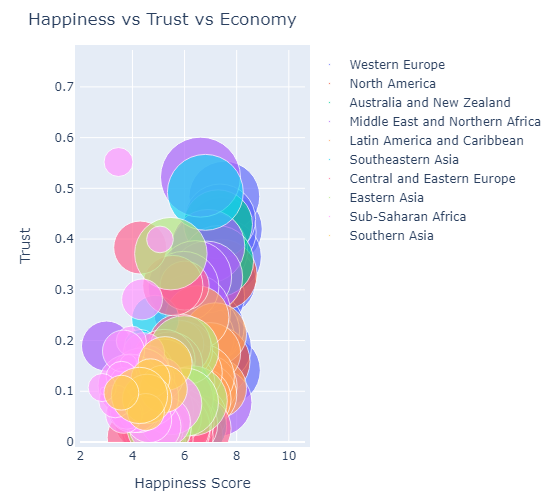

In [30]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Trust (Government Corruption)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Trust", title = 'Happiness vs Trust vs Economy',
    x_logscale = False, scale_bubble = 1, height = 500)

py.iplot(figure, config={'scrollzoom': True})

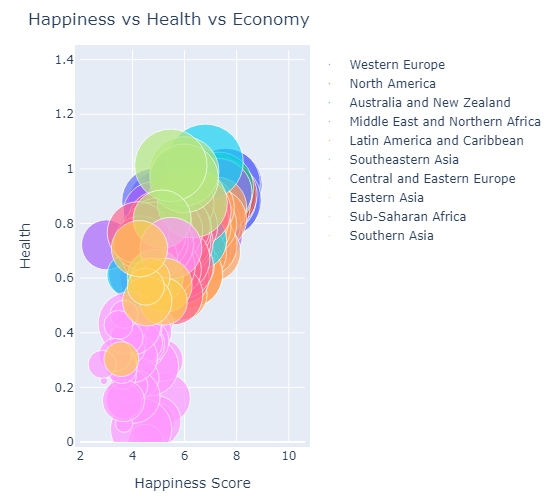

In [31]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Health (Life Expectancy)', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 1, height = 500)

py.iplot(figure, config={'scrollzoom': True})


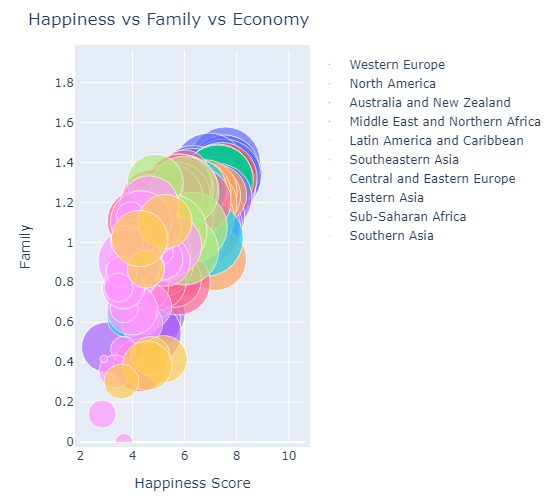

In [32]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'Happiness Score', y_column = 'Family', 
    bubble_column = 'Country', size_column = 'Economy (GDP per Capita)', color_column = 'Region', 
    x_title = "Happiness Score", y_title = "Family", title = 'Happiness vs Family vs Economy',
    x_logscale = False, scale_bubble = 1, height = 500)

py.iplot(figure, config={'scrollzoom': True})

### .
* It is Quite Visible that as the Family Satisfaction ratings increases the Happiness Score increases. So, We can say that they have a direct relationship between them.

* Also, European Countries and Austrelia are the Happiest Regions. After America.

* There is not even a single country in American Region with low Happiness Index.

* Asian and African countries suffer with some serious issues, that is why none of the Asian orr African Country stands at a good position in terms of Happiness Index.

* Some Countries in Middle East are Happy while some are Unhappy.

In [33]:
import plotly.figure_factory as ff

data_chart = (
  {"label": "Happiness", "sublabel":"score",
   "range": [5, 6, 8], "performance": [5.5, 6.5], "point": [7]},
  {"label": "Economy", "sublabel": "score", "range": [0, 1, 2],
   "performance": [1, 1.5], "sublabel":"score","point": [1.5]},
  {"label": "Family","sublabel":"score", "range": [0, 1, 2],
   "performance": [1, 1.5],"sublabel":"score", "point": [1.3]},
  {"label": "Freedom","sublabel":"score", "range": [0, 0.3, 0.6],
   "performance": [0.3, 0.4],"sublabel":"score", "point": [0.5]},
  {"label": "Trust", "sublabel":"score","range": [0, 0.2, 0.5],
   "performance": [0.3, 0.4], "point": [0.4]}
)

fig = ff.create_bullet(
    data_chart, titles='label', subtitles='sublabel', markers='point',
    measures='performance', ranges='range', orientation='v',
)
py.iplot(fig, filename='bullet chart from dict')

#### Bullet Chart to Represent the Range for some of the most Important Attributes given in the data. We have taken Happiness, Economy, Freedom, and Family. for analysis of their range.

### 
* If the values for the given attributes lie in the Dark Blue Region then it is in the critical region.

* If the values for the given attributes lie in the light blue region then is is in good condition.

* If the values for the given attributes lie above or near the diamond then is in the best state or condition.

* White Regions are depicting the Maxima that could be achieved.

In [34]:
data

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Economy (GDP per Capita)   Family  \
0              7.587                   1.39651  1.34951   
1              7.561                   1.30232  1.40223   
2              7.527                   1.32548  1.36058   
3              7.522                   1.45900  1.33095   
4              7.427                   1.32629  1.32261   
..               ...                       ...      ...   
153            3.465                   0.22208  0.77370   
154            3.340                   0.28665  0.35386   
155            3.006                   0.66320  0.47489   
156            2.905                   0.01530  0.41587   
157            2.839                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 11 columns]

In [35]:
import plotly.graph_objs as go

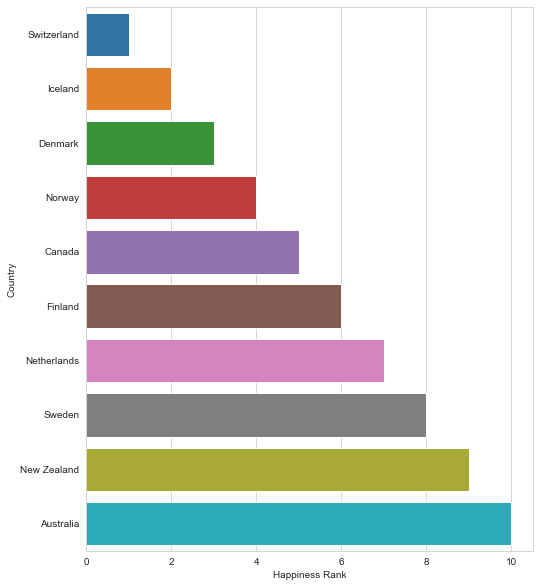

In [36]:
plt.figure(figsize = (8, 10))
sns.barplot(data['Happiness Rank'][:10], data['Country'][:10])
plt.show()

#### Top 10 Most Freedom Oriented Countries

In [37]:
data[['Country', 'Freedom']].sort_values(by = 'Freedom', ascending = False).head(10)


Country  Freedom
3                  Norway  0.66973
0             Switzerland  0.66557
144              Cambodia  0.66246
7                  Sweden  0.65980
43             Uzbekistan  0.65821
9               Australia  0.65124
2                 Denmark  0.64938
5                 Finland  0.64169
19   United Arab Emirates  0.64157
27                  Qatar  0.64040

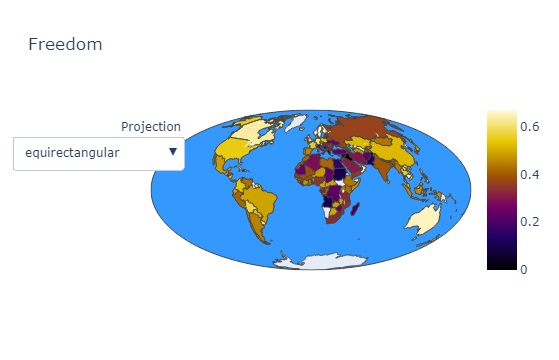

In [38]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = data['Country'],
               text = data['Country'], 
               z = data['Freedom'],
               )]

layout = dict(title = 'Freedom',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)

py.iplot(fig)

#### Top 10 Countries with best GDP

In [39]:
data[['Country', 'Economy (GDP per Capita)']].sort_values(by = 'Economy (GDP per Capita)',
            ascending = False).head(10)

Country  Economy (GDP per Capita)
27                 Qatar                   1.69042
16            Luxembourg                   1.56391
38                Kuwait                   1.55422
23             Singapore                   1.52186
3                 Norway                   1.45900
19  United Arab Emirates                   1.42727
0            Switzerland                   1.39651
34          Saudi Arabia                   1.39541
14         United States                   1.39451
71             Hong Kong                   1.38604

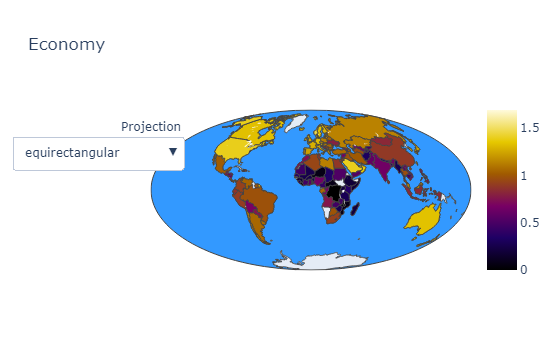

In [40]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = data['Country'],
               text = data['Country'], 
               z = data['Economy (GDP per Capita)'],
               )]

layout = dict(title = 'Economy',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.8, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=0.1, y=0.8, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)

py.iplot(fig)

#### Top 10 Countries in Family Satisfaction

In [41]:
data[['Country', 'Family']].sort_values(by = 'Family',
            ascending = False).head(10)

Country   Family
1       Iceland  1.40223
17      Ireland  1.36948
2       Denmark  1.36058
0   Switzerland  1.34951
43   Uzbekistan  1.34043
3        Norway  1.33095
4        Canada  1.32261
8   New Zealand  1.31967
5       Finland  1.31826
35        Spain  1.31379

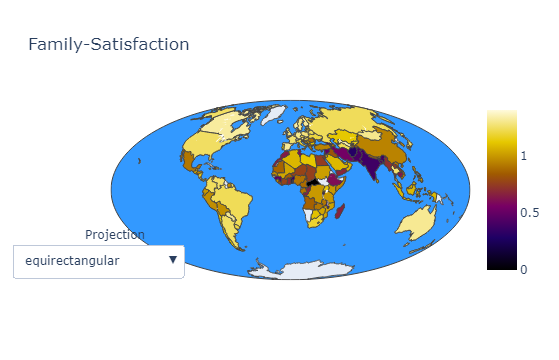

In [42]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = data['Country'],
               text = data['Country'], 
               z = data['Family'],
               )]

layout = dict(title = 'Family-Satisfaction',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.2, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=.2, y=.2, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)

py.iplot(fig)

#### Top 10 Coutries with Health

In [43]:
data[['Country', 'Health (Life Expectancy)']].sort_values(by = 'Health (Life Expectancy)',
            ascending = False).head(10)

Country  Health (Life Expectancy)
23    Singapore                   1.02525
71    Hong Kong                   1.01328
45        Japan                   0.99111
46  South Korea                   0.96538
35        Spain                   0.95562
49        Italy                   0.95446
1       Iceland                   0.94784
28       France                   0.94579
0   Switzerland                   0.94143
9     Australia                   0.93156

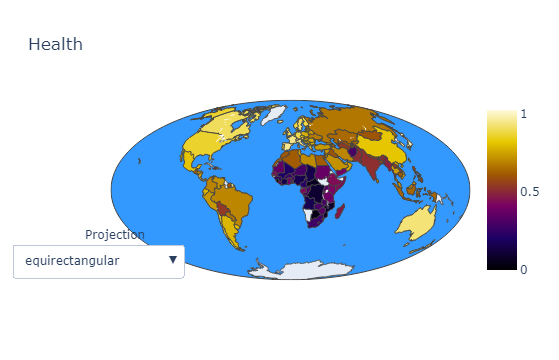

In [44]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = data['Country'],
               text = data['Country'], 
               z = data['Health (Life Expectancy)'],
               )]

layout = dict(title = 'Health',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.2, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=.2, y=.2, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)

py.iplot(fig)

#### Top 10 Countries with Trust in Government

In [45]:
data[['Country', 'Trust (Government Corruption)']].sort_values(by = 'Trust (Government Corruption)',
            ascending = False).head(10)

Country  Trust (Government Corruption)
153                Rwanda                        0.55191
27                  Qatar                        0.52208
23              Singapore                        0.49210
2                 Denmark                        0.48357
7                  Sweden                        0.43844
8             New Zealand                        0.42922
0             Switzerland                        0.41978
5                 Finland                        0.41372
90      Somaliland region                        0.39928
19   United Arab Emirates                        0.38583

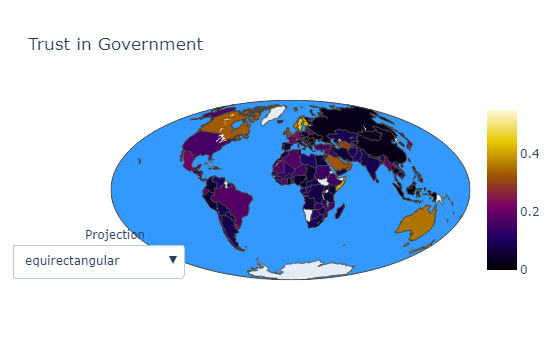

In [46]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = data['Country'],
               text = data['Country'], 
               z = data['Trust (Government Corruption)'],
               )]

layout = dict(title = 'Trust in Government',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.2, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=.2, y=.2, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)

py.iplot(fig)

####  Most Generous Countries

In [47]:
data[['Country', 'Generosity']].sort_values(by = 'Generosity',
            ascending = False).head(10)

Country  Generosity
128            Myanmar     0.79588
33            Thailand     0.57630
20      United Kingdom     0.51912
36               Malta     0.51752
73           Indonesia     0.51535
90   Somaliland region     0.50318
78              Bhutan     0.47998
6          Netherlands     0.47610
8          New Zealand     0.47501
155              Syria     0.47179

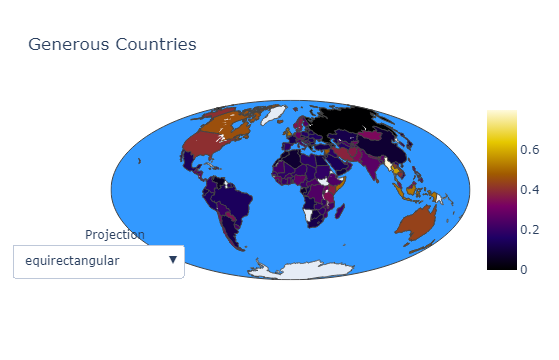

In [48]:
trace1 = [go.Choropleth(
               colorscale = 'Electric',
               locationmode = 'country names',
               locations = data['Country'],
               text = data['Country'], 
               z = data['Generosity'],
               )]

layout = dict(title = 'Generous Countries',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'hammer'
        )))


projections = [ "equirectangular", "mercator", "orthographic", "natural earth","kavrayskiy7", 
               "miller", "robinson", "eckert4", "azimuthal equal area","azimuthal equidistant", 
               "conic equal area", "conic conformal", "conic equidistant", "gnomonic", "stereographic", 
               "mollweide", "hammer", "transverse mercator", "albers usa", "winkel tripel" ]

buttons = [dict(args = ['geo.projection.type', y],
           label = y, method = 'relayout') for y in projections]
annot = list([ dict( x=0.1, y=0.2, text='Projection', yanchor='bottom', 
                    xref='paper', xanchor='right', showarrow=False )])


# Update Layout Object

layout[ 'updatemenus' ] = list([ dict( x=.2, y=.2, buttons=buttons, yanchor='top' )])
layout[ 'annotations' ] = annot


fig = go.Figure(data = trace1, layout = layout)

py.iplot(fig)

<AxesSubplot:ylabel='Country'>

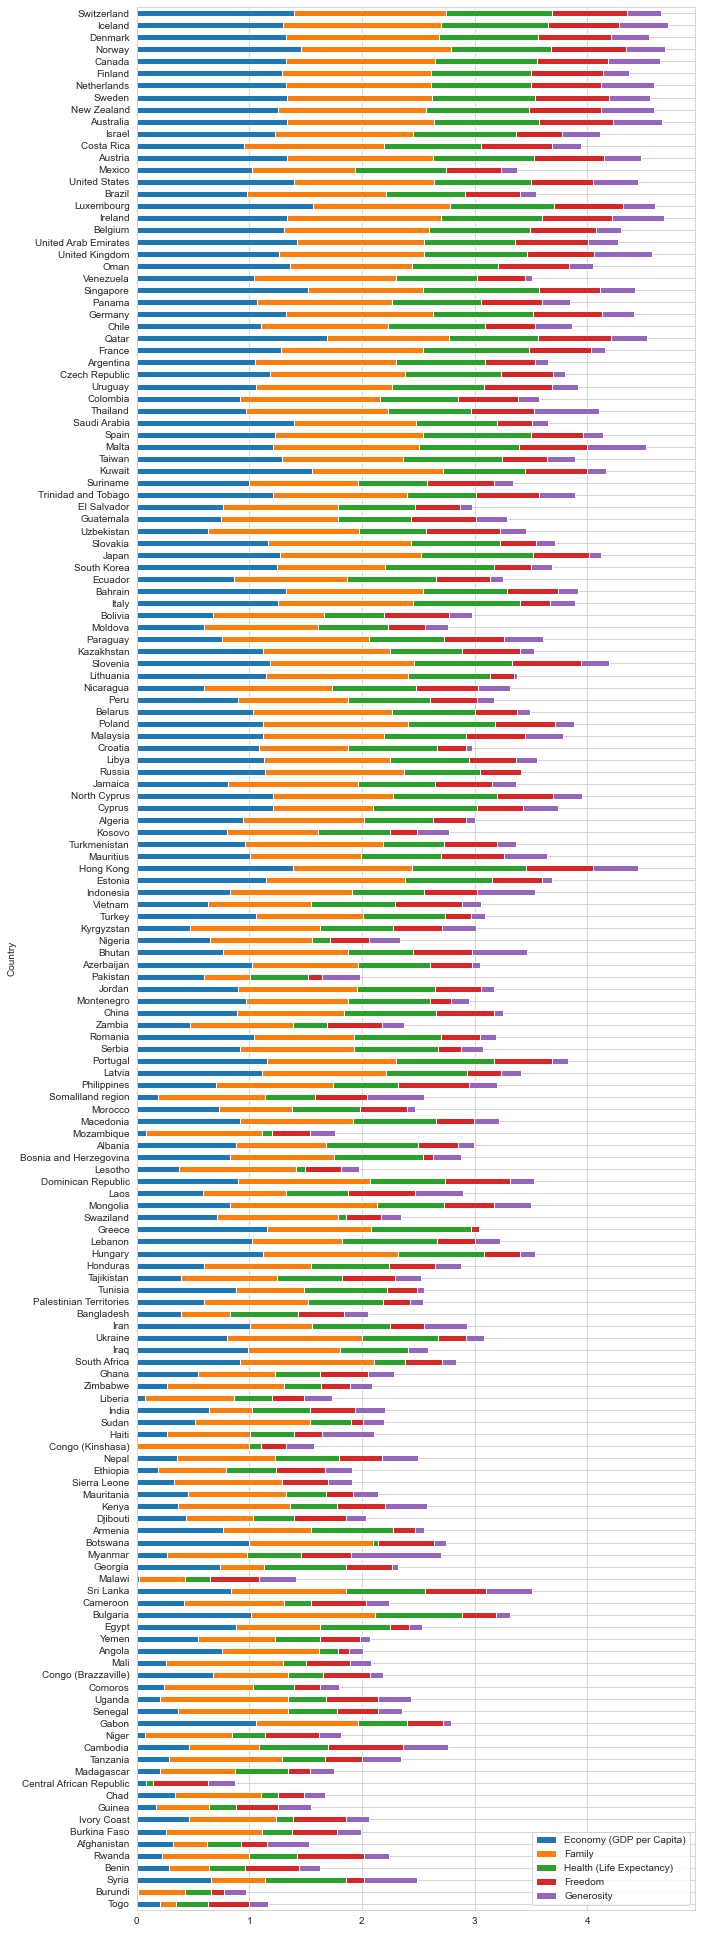

In [53]:
data=data.sort_values('Happiness Rank',ascending=False)
df_wh=data.filter(['Country','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Trust(Government Corruption)'])
df_wh=df_wh.set_index('Country')
df_wh.plot.barh(stacked=True,  figsize=(10,35))

In [54]:
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler

### Clustering is divding data into groups of homogenous or similar data. So that data in same group is more similar to each other and very different from data in other groups. Each group of similar data is called cluster
#### We will now perform clustering of World Happiness Report data using different methods of clustering.There are following clustering algorithems and techniques available for clustering.
* K-Means Clustering(Partitioning Based)
* Spectral
* Affinity Propagation
* Mean Shift
* DBSCAN(Density Based)
* Mini Batch K-Means(Partitioning Based)
* Birch(Hierarchical)
* Gaussian Mixture Modeling

##### K Means Clustering - K means clustering works by selecting centroids randomly and number of centroids are inputs to clustering algorithm.Once random centroids are selected then distance from each centroid for each observations are calculated and each observation data is allocated to a centroid to which distance of observation is minimum.

In [55]:
# Method for K means clustering
def kmeans_Clustering(data,numberOfClusters):
       #Initializing Kmeans.cluster object was imported from sklearn in begining.
        kmeans = cluster.KMeans(n_clusters=numberOfClusters)
       # Fitting the input data and getting the cluster labels
        cluster_labels = kmeans.fit_predict(data)
       # Getting the cluster centers
        cluster_centers = kmeans.cluster_centers_
        cluster_centers.shape
        return cluster_labels,cluster_centers

In [99]:
#### We will plots clusters of all the 6 dimensions with 2 dimensions in each 2 dimensional plot

In [56]:
#Plot the cluster
def plot_cluster(labels,centers,df_wh):
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for i,j in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        ax[j].scatter(df_wh.iloc[:, i], df_wh.iloc[:, i+1], c=labels, s=50, cmap='viridis')
        ax[j].scatter(centers[:,i], centers[:, i+1], c='black', s=200, alpha=0.5)
         #print(i)
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

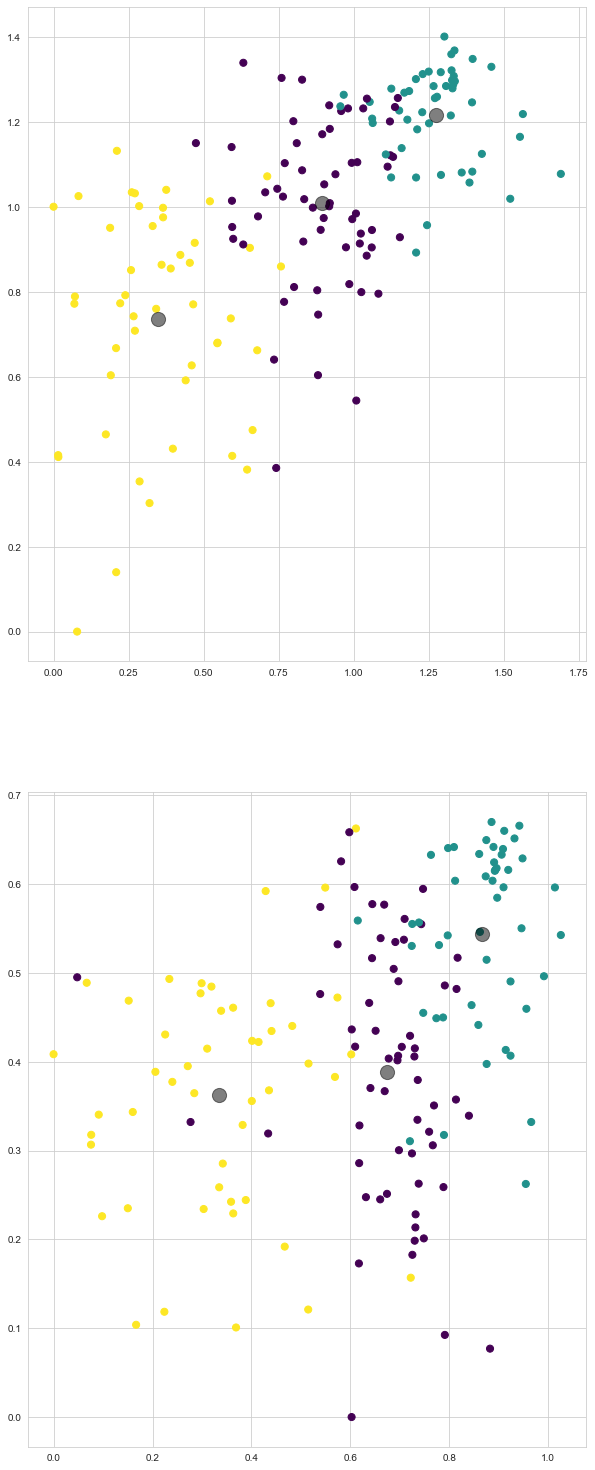

In [57]:
labels,centers = kmeans_Clustering(df_wh,3)     
plot_cluster(labels,centers,df_wh)

#### B .) Spectral Clustering - Objective of spectral clustering is to cluster data that which is connected but not necessarily clustered within convex boundaries.Spectral clustering use the affnity matrix to detemine the connectivity of data for clustering 

In [58]:
def spectral_Clustering(data,numberOfClusters):
       #Initializing cluster.cluster object was imported from sklearn in begining.
        spectral = cluster.SpectralClustering(n_clusters=numberOfClusters,affinity="nearest_neighbors",eigen_solver='arpack')
       # Fitting the input data and getting the cluster labels
        cluster_labels = spectral.fit_predict(data)
       # Getting the cluster centers
        return cluster_labels

In [59]:
#Plot the cluster without center
def plot_clusterWithoutCenter(labels,df_wh):
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for i,j in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
         ax[j].scatter(df_wh.iloc[:, i], df_wh.iloc[:, i+1], c=labels, s=50, cmap='viridis')
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

In [60]:
labels = spectral_Clustering(df_wh,3)    
plot_clusterWithoutCenter(labels,df_wh)

#### C.) Affinity Propagation- Affinity Propagation works by setting up a factor graph that describes the objective function used to identify exemplars and cluster data. Each item in a dataset can be mapped into Euclidean space using feature values. Affinity propagation depends on a matrix containing Euclidean distances between data points. Since the matrix can quickly become quite large, we should be careful not to take up too much memory

In [61]:
 def affinityPropagation_Clustering(data):
        affinity_propagation =  cluster.AffinityPropagation(preference=-10,damping=0.5,affinity='euclidean')
        af = affinity_propagation.fit(data)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters_ = len(cluster_centers_indices)
        #print(n_clusters_)
        return affinity_propagation.predict(data),n_clusters_,cluster_centers_indices

In [68]:
from itertools import cycle
plt.close('all')
plt.figure(1)
plt.clf()
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

def drawAffinityCluster(labels,n_clusters_,cluster_centers_indices):
     #Getting number of columns
     numOfDimensions = df_wh.columns.size
     #Number of plots required for 6 dimension with 2 dimensions in each plot
     numberOfPlots = int(numOfDimensions/2)
     #Number of rows and columns for subplots
     fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
     for column,plot in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        for cluster, col in zip(range(n_clusters_), colors):
            # This will provide cluster center for both clusters for all dimensions
            cluster_center = df_wh.iloc[cluster_centers_indices[cluster],:]
            #This will plot cluster center for first 2 dimensions
            ax[plot].plot(cluster_center[column], cluster_center[column+1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
            # we will traverse through cluster labels and if cluster label is equal cluster 0 then it will 
            # plot data point for tht and if cluster label is equal to cluster number 1(k) then it will plot cluster
            # 1 data
            for i in range(labels.size):
                if cluster==labels[i]:
                    ax[plot].plot(df_wh.iloc[i, column], df_wh.iloc[i, column+1], col + '.')
                    # This will draw affinity line between center and data point
                    ax[plot].plot([cluster_center[column], df_wh.iloc[i, column]], [cluster_center[column+1], df_wh.iloc[i, column+1]], col)

     plt.title('Estimated number of clusters: %d' % n_clusters_)
     plt.show()

<Figure size 432x288 with 0 Axes>

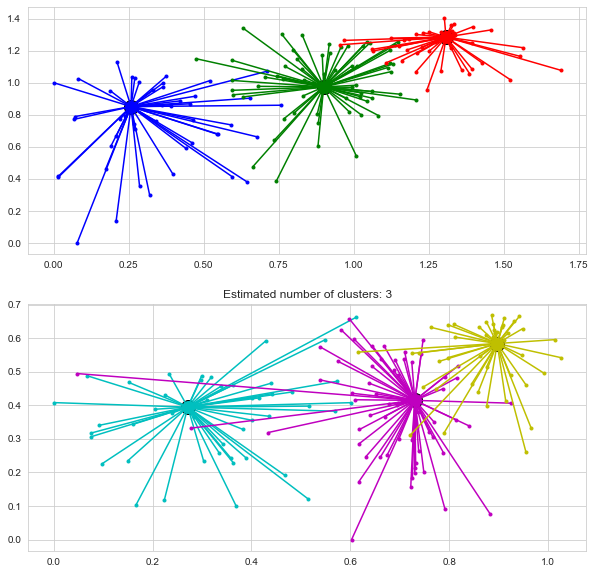

In [69]:
labels,n_clusters_,cluster_centers_indices = affinityPropagation_Clustering(df_wh)    
drawAffinityCluster(labels,n_clusters_,cluster_centers_indices)

#### D.) Mean Shift:-Meanshift is a clustering algorithm that assigns the datapoints to the clusters iteratively by shifting points towards highest density of datapoints . Meanshift algorithm has applications in the field of image processing and computer vision.Mean shift exploits this KDE idea by imagining what the points would do if they all climbed up hill to the nearest peak on the KDE surface. It does so by iteratively shifting each point uphill until it reaches a peak.

In [70]:
  def meanshift_Cluster(data):
        meanShift = cluster.MeanShift(bandwidth=0.4,bin_seeding=True )
        labels = meanShift.fit_predict(data)
        labels_unique = np.unique(labels)
        n_clusters = len(labels_unique)
        cluster_centers = meanShift.cluster_centers_
        return  labels,cluster_centers,n_clusters

In [71]:
def plotMeanShift(labels,cluster_centers,n_clusters):
     #Getting number of columns
     numOfDimensions = df_wh.columns.size
     #Number of plots required for 6 dimension with 2 dimensions in each plot
     numberOfPlots = int(numOfDimensions/2)
     #Number of rows and columns for subplots
     fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
     for column,plot in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        for cluster, col in zip(range(n_clusters), colors):
            #This will plot cluster center for first 2 dimensions
            ax[plot].plot(cluster_centers[cluster,column], cluster_centers[cluster,column+1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)
            # we will traverse through cluster labels and if cluster label is equal cluster 0 then it will 
            # plot data point for tht and if cluster label is equal to cluster number 1(k) then it will plot cluster
            # 1 data
            for i in range(labels.size):
                if cluster==labels[i]:
                    ax[plot].plot(df_wh.iloc[i, column], df_wh.iloc[i, column+1], col + '.')
                    # This will draw affinity line between center and data point
                    #ax[plot].plot([cluster_centers[column], df_wh.iloc[i, column]], [cluster_centers[column+1], df_wh.iloc[i, column+1]], col)

     plt.title('Estimated number of clusters: %d' % n_clusters)
     plt.show()

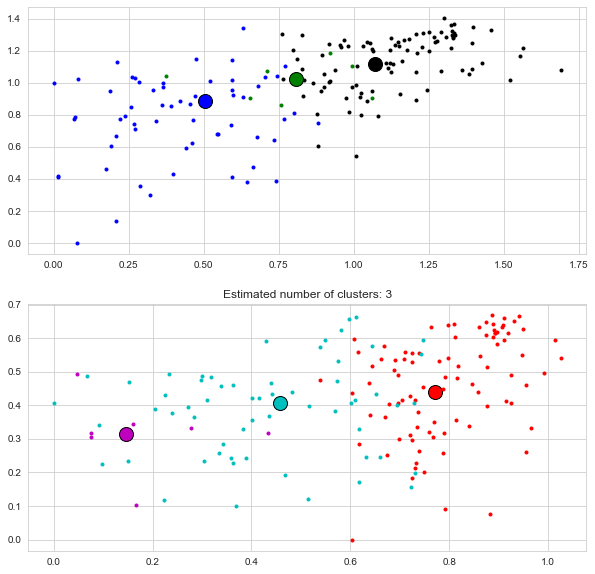

In [72]:
labels,cluster_centers,n_clusters = meanshift_Cluster(df_wh)    
plotMeanShift(labels,cluster_centers,n_clusters)


#### E.) DBSCAN - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is the most well-known density-based clustering algorithm.Mostly it is used to demonstrate how to reduce the size of a spatial data set of GPS latitude-longitude coordinates

In [73]:
def dbscan_Cluster(data):
    dbscan=cluster.DBSCAN(eps=0.3, min_samples=10)
    dbsclabels=dbscan.fit_predict(data)
    core_indices=dbscan.core_sample_indices_ 
    return dbsclabels,core_indices
    
dbsclabels,coreIndices=dbscan_Cluster(df_wh)
length=dbsclabels
print(dbsclabels)

[-1 -1 -1 -1  0 -1  0  0 -1  0 -1  0  0 -1  0  1  0  0  0 -1  0 -1  0  1
  1  0  1 -1 -1 -1 -1  1 -1  0  0  0 -1  0 -1  0  0 -1  0  0  0 -1  1  1
 -1 -1  1  1  0  1  1  1  1 -1  1 -1  1  0  1  1  0  1 -1  0  1  1  1  1
  1  0  1  1  1 -1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [74]:
def drawDbscanPlot(dbsclabels):
        #Getting number of columns
        numOfDimensions = df_wh.columns.size
        #Number of plots required for 6 dimension with 2 dimensions in each plot
        numberOfPlots = int(numOfDimensions/2)
        #Number of rows and columns for subplots
        colorsArray=['b','g','r']
        #print(type(dbsclabels))
        fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
        for column,pltnum in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
            for i,label in enumerate(dbsclabels):
                colour=colorsArray[label]
                marker_size=12
                if label == -1:
                    #black color
                    colour=[0, 0, 0, 1]
                    marker_size=6
                ax[pltnum].plot(df_wh.iloc[i,column],df_wh.iloc[i,column+1],'o',markerfacecolor=colour,markeredgecolor='k', markersize=marker_size)

        plt.show()


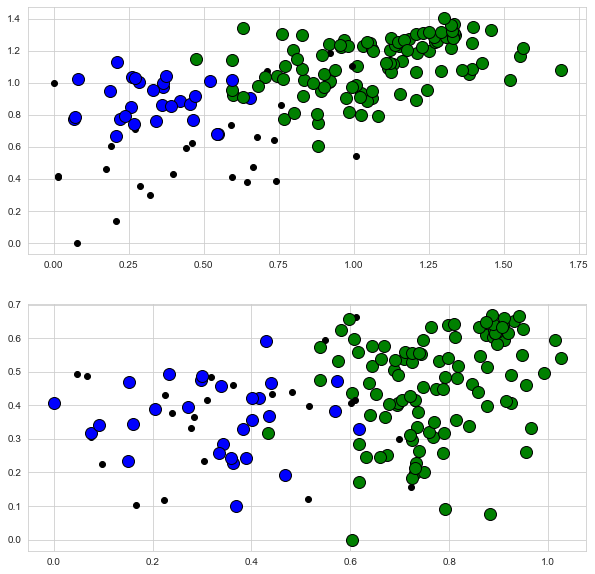

In [75]:
drawDbscanPlot(dbsclabels)

#### F. ) Mini Batch K-Means - Mini-batch KMeans is very useful in case of extremely large datasets and/or very high dimensional data which is often the case in text mining. One can switch to Mini-batch KMeans training while creating KMeans object as follows.Mini Batch K-means has been proposed as an alternative to the K-means algorithm for clustering massive datasets. The advantage of this algorithm is to reduce the computational cost by not using all the dataset each iteration but a subsample of a fixed size

In [93]:
# Method for Mini batch K means clustering
def minikmeans_Clustering(data,numberOfClusters):
       #Initializing Kmeans.cluster object was imported from sklearn in begining.
        minikmeans = cluster.MiniBatchKMeans(n_clusters=numberOfClusters, max_iter=100, batch_size=100)
       # Fitting the input data and getting the cluster labels
        cluster_labels = minikmeans.fit_predict(data)
       # Getting the cluster centers
        cluster_centers = minikmeans.cluster_centers_
        cluster_centers.shape
        return cluster_labels,cluster_centers

In [94]:
def plot_miniKMeans(mini_labels,mini_centers):
    numberOfClusters=np.unique(mini_labels).size
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #number of rows
    numOfRows=len(df_wh.index)
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    colorsArray=['b','g','r']
    #print(type(dbsclabels))
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for column,pltnum in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        #For every dimension first we will plot the Kmean cluster center
        for row in range(0,numberOfClusters):
             #we need to select unique labels for 3 centers to have same colors as rest of the cluster data but with different marker
            colour=colorsArray[np.unique(mini_labels)[row]]
            ax[pltnum].plot(mini_centers[row,column],mini_centers[row,column+1],'o',markerfacecolor=colour,markeredgecolor=colour, markersize=12)
        #For Every dimension we will plot the cluster data
        for row in range(0,numOfRows):
             #for every row in every dimension we need to assign different color for cluster label assign to row, so we will select label number and which will select color using tht number
            colour=colorsArray[mini_labels[row]]
            ax[pltnum].plot(df_wh.iloc[row,column],df_wh.iloc[row,column+1],'.',markerfacecolor=colour,markeredgecolor=colour,markersize=4)

    plt.show()

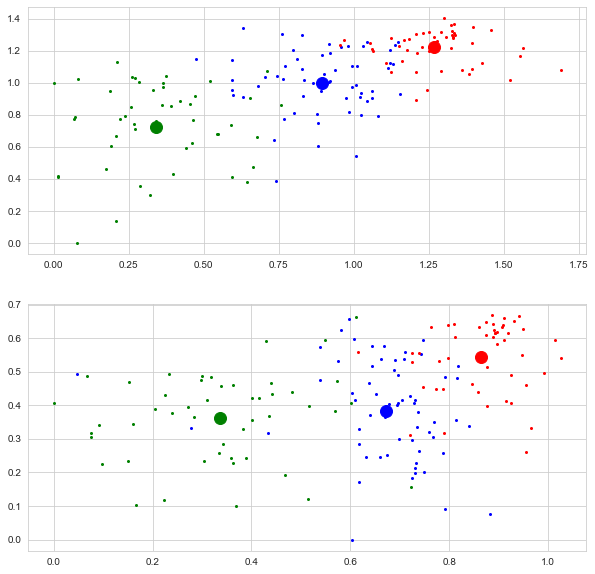

In [95]:
mini_labels,mini_centers=minikmeans_Clustering(df_wh,3)
plot_miniKMeans(mini_labels,mini_centers)

#### G.) Birch-Balanced Iterative Reducing and Clustering using Hierarchies is hierarichal clustering algorithm. It constructs a tree data structure with the cluster centroids being read off the leaf. These can be either the final cluster centroids or can be provided as input to another clustering algorithm such as AgglomerativeClusterin
* There are two key phases for Birch clustering-

1. Scans the database to build an in-memory tree
2. Applies clustering algorithm to cluster the leaf nodes It builds a dendrogram called clustering feature tree (CF tree) while scanning the data set. The data is essentially lossy compressed to a set of Characteristic Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Characteristic Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children.

In [79]:
# Method for Birch clustering
def birch_Clustering(data,numberOfClusters):
       #Initializing Kmeans.cluster object was imported from sklearn in begining.
       birch_clust = cluster.Birch(n_clusters=numberOfClusters)
       # Fitting the input data and getting the cluster labels
       cluster_labels = birch_clust.fit_predict(data)
       # Getting the cluster centers
       cluster_centers = birch_clust.subcluster_centers_
      
       return cluster_labels,cluster_centers

In [80]:
def plot_birch(birch_labels,birch_centers): 
    numberOfClusters=np.unique(birch_labels).size
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #number of rows
    numOfRows=len(df_wh.index)
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    colorsArray=['b','g','r']
    #print(type(dbsclabels))
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(10,10))
    for column,pltnum in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        #For every dimension first we will plot the Kmean cluster center
        for row in range(0,numberOfClusters):
             #we need to select unique labels for 3 centers to have same colors as rest of the cluster data but with different marker
             colour=colorsArray[np.unique(birch_labels)[row]]
             ax[pltnum].plot(birch_centers[row,column],birch_centers[row,column+1],'o',markerfacecolor=colour,markeredgecolor=colour, markersize=12)
        #For Every dimension we will plot the cluster data
        for row in range(0,numOfRows):
             #for every row in every dimension we need to assign different color for cluster label assign to row, so we will select label number and which will select color using tht number
             colour=colorsArray[birch_labels[row]]
             ax[pltnum].plot(df_wh.iloc[row,column],df_wh.iloc[row,column+1],'x',markerfacecolor=colour,markeredgecolor=colour,markersize=4)

    plt.show()

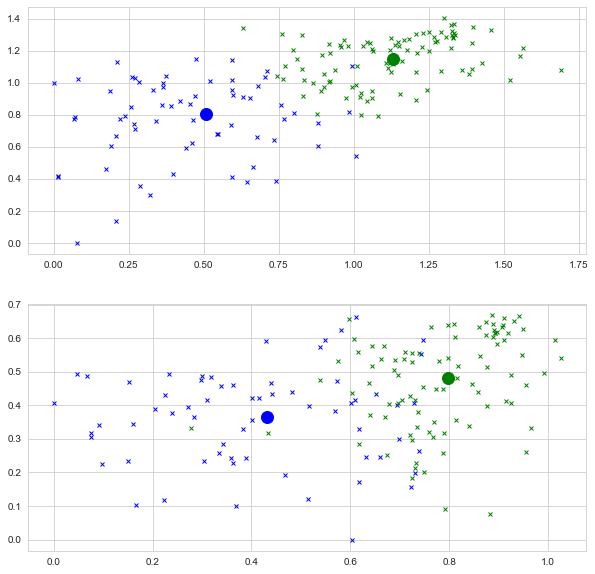

In [81]:
birch_labels,birch_centers=birch_Clustering(df_wh,3)
plot_birch(birch_labels,birch_centers)

#### H. ) GMM - A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset.But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments.It can also draw confidence ellipsoids for multivariate models

In [88]:
# Method for GMM clustering
def gmm_Clustering(data,numberOfComponents):
       #Initializing Kmeans.cluster object was imported from sklearn in begining.
        gmm_clust = mixture.GaussianMixture(n_components=numberOfComponents, covariance_type='full')
       # Fitting the input data and getting the cluster labels
        cluster_labels = gmm_clust.fit(data).predict(data)
        cmeans = gmm_clust.means_ 
        cvariance =  gmm_clust.covariances_ 
        return cluster_labels,cmeans,cvariance,gmm_clust

In [92]:
def plot_gmm(gmm_Labels,cluster_means,covariances,gmm): 
    numberOfClusters=np.unique(gmm_Labels).size
    #Getting number of columns
    numOfDimensions = df_wh.columns.size
    #number of rows
    numOfRows=len(df_wh.index)
    #Number of plots required for 6 dimension with 2 dimensions in each plot
    numberOfPlots = int(numOfDimensions/2)
    #Number of rows and columns for subplots
    colorsArray=['b','g','r','c','m','y']
    fig,ax = plt.subplots(numberOfPlots,1, figsize=(15,15))
    for column,pltnum in zip(range(0,numOfDimensions,2),range(0,numberOfPlots)):
        #For Every dimension we will plot the cluster data
        for row in range(0,numOfRows):
             #for every row in every dimension we need to assign different color for cluster label assign to row, so we will select label number and which will select color using tht number
            colour=colorsArray[gmm_Labels[row]]
            ax[pltnum].scatter(df_wh.iloc[row,column],df_wh.iloc[row,column+1],c=colour, s=40, cmap='viridis', zorder=2,alpha=0.8)
            w_factor = 0.2 / gmm.weights_.max()
    plt.show()

In [90]:
#Draw ellipses for GMM
from matplotlib.patches import Ellipse ## foor creating GMM ellipse
from scipy import linalg
import matplotlib as mpl

def draw_ellipse(mean, covariance, ax):
             v, w = linalg.eigh(covariance)
             v = 2. * np.sqrt(2.) * np.sqrt(v)
             u = w[0] / linalg.norm(w[0])
             angle = np.arctan(u[1] / u[0])
             angle = 180. * angle / np.pi  # convert to degrees
             ell = mpl.patches.Ellipse(mean, v[0], v[1], angle, color='b')
             ell.set_clip_box(ax.bbox)
             ell.set_alpha(0.5)
             ax.add_artist(ell)

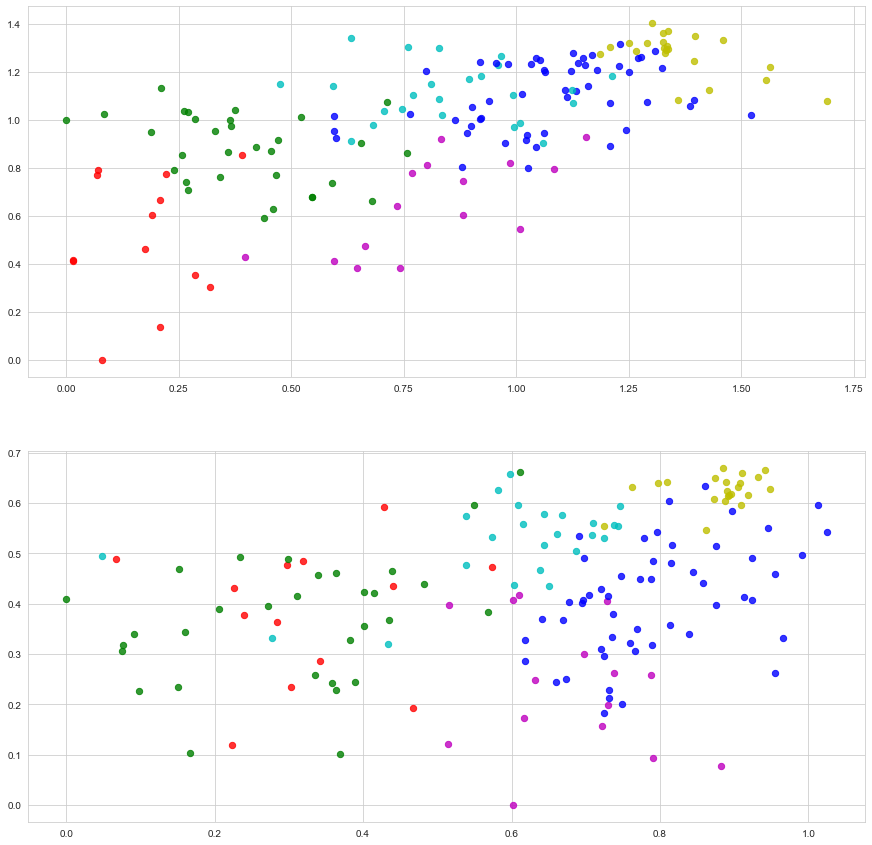

In [91]:
gmm_Labels,cluster_means,covariances,gmm=gmm_Clustering(df_wh,6)
plot_gmm(gmm_Labels,cluster_means,covariances,gmm)

In [101]:
import pickle

Pkl_Filename = "Kmeans.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(cluster.KMeans, file)